# Rain Prediction, Will it rain or not Tomorrow!!!


Shivani Pandey (C0791980) 

Sriram Raman (C0787336) 

Swathi Gurijala (C0790294)

Varadharajan Kalyanaraman (C0793756) 

#### Content of this Problem

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability

##### RainTomorrow: The target variable. Did it rain the following day? YES/NO

- Date: The date of observation

- Location: The common name of the location of the weather station
- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall: The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine: The number of hours of bright sunshine in the day.
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am: Direction of the wind at 9am
- WindDir3p: Direction of the wind at 3pm
- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9a: Humidity (percent) at 9am
- Humidity3pm: Humidity (percent) at 3pm
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am: Temperature (degrees C) at 9am
- Temp3pm: Temperature (degrees C) at 3pm
- RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RISK_MM: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". Will be left out in the model.

### Importing important and basic libraries and packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Import dataset 
The next step is to import the dataset.

In [4]:
data = 'weatherAUS.csv.zip'

df = pd.read_csv(data)

## Exploratory data analysis 
We have imported the data.

Now, its time to explore the data to gain insights about it.

In [5]:
df.shape

(142193, 24)

there are 142193 instances and 24 variables in the data set.

In [6]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [7]:
table_headings = df.columns

table_headings

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

## Drop RISK_MM variable 

as per dataset description, we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows-

In [8]:
df.drop(['RISK_MM'], axis=1, inplace=True)

summary of dataset 

In [9]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Categorical variables have data type object.

Numerical variables have data type float64

## statistical properties of dataset 

In [10]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

If we want to view the statistical properties of character variables, we should run the following command -

> df.describe(include=['object'])

If we want to view the statistical properties of all the variables, we should run the following command -

> df.describe(include='all')

## Check for missing values

Missing values in Target variable

In [11]:
df['RainTomorrow'].isnull().sum()

0

classification of the target variable

In [12]:
df['RainTomorrow'].nunique()

2

There are only 2 values in our target variable

In [13]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

Yes and No are the two Unique values -> hence this is a Binary classification problem

frequency distribution of values

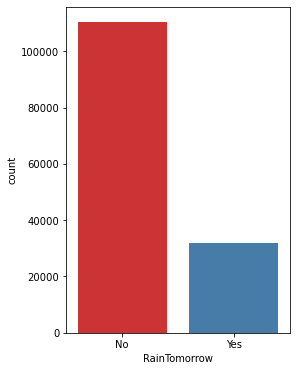

In [14]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

percentage of frequency distribution of values

In [15]:
df['RainTomorrow'].value_counts()/len(df) * 100

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

No appears 77.58% times and Yes appears 22.42% times.

The No variable have 110316 entries, and

The Yes variable have 31877 entries.

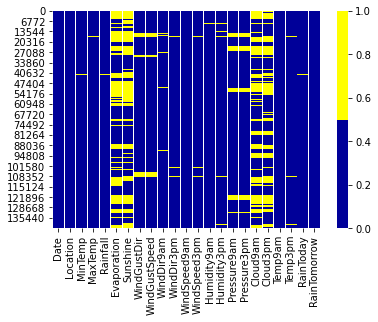

In [16]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Rainfall Monthwise EDA

## Exploring Categorical Variables 

In [17]:

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
df[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

There are two binary categorical variables - RainToday and RainTomorrow(Target variable)

#### Missing values in categorical variables

In [19]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


> Only 4 Categorical variables are having Missing values, this is a good news 

 #### Cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [20]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


Date variable which needs to be preprocessed, since it has the highest cardinality and it will cause some problems while modelling

Date variable if of Object type, hence we are converting it into date time format for preprocessing


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

#### Extracting the year, month, day from Date variable

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Since we have created three additional columns created from Date variable. Now, we will drop the original Date variable from the dataset.

In [23]:
df.drop('Date', axis=1, inplace = True)

In [24]:
df.Year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int64)

In [25]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

we could see that there are 3 new additional columns added at the last and Date has been removed from the dataframe

In [26]:
# plotting Rainfall per Month
plt.figure(figsize=(8,5))
sns.barplot(x = 'Month', y='Rainfall', data=df, color = 'skyblue')
plt.box(False)
plt.title ('Rainfall throughout Months', fontweight="bold",fontsize=15)

Text(0.5, 1.0, 'Rainfall throughout Months')

#### Explore Location variable

In [27]:
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


One hot Encoding for 49 labels

In [28]:
pd.get_dummies(df.Location, drop_first=True).head()

Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  Brisbane  \
0       0       1             0              0         0        0         0   
1       0       1             0              0         0        0         0   
2       0       1             0              0         0        0         0   
3       0       1             0              0         0        0         0   
4       0       1             0              0         0        0         0   

   Cairns  Canberra  Cobar  ...  Townsville  Tuggeranong  Uluru  WaggaWagga  \
0       0         0      0  ...           0            0      0           0   
1       0         0      0  ...           0            0      0           0   
2       0         0      0  ...           0            0      0           0   
3       0         0      0  ...           0            0      0           0   
4       0         0      0  ...           0            0      0           0   

   Walpole  Watsonia  Williamtown  Witchcliffe  Wollongong  Woomera  
0        0         0            0            0           0        0  
1        0         0            0            0           0        0  
2        0         0            0            0           0        0  
3        0         0            0            0           0        0  
4        0         0            0            0           0        0  

[5 rows x 48 columns]

Explore WindGustDir variable

In [29]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


One hot Encoding for 17 labels

In [30]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
2    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3    0    0  0   1    0    0   0  0   0    0    0   0  0    0    0    0
4    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0

We have added an additional dummy variable(NaN) to indicate there was missing data

Explore WindDir9am variable

In [31]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


One hot Encoding for 17 labels

In [32]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1    0    0  0   0    0    1   0  0   0    0    0   0  0    0    0    0
2    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
3    0    0  0   0    0    0   0  0   1    0    0   0  0    0    0    0
4    1    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0

We have added an additional dummy variable(NaN) to indicate there was missing data

Explore WindDir3pm variable

In [33]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


One hot Encoding for 17 labels

In [34]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
1    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
2    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3    0    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0
4    0    0  0   0    0    0   1  0   0    0    0   0  0    0    0    0

We have added an additional dummy variable(NaN) to indicate there was missing data

#### Explore RainToday variable

In [35]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [36]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [37]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

Yes  NaN
0    0    0
1    0    0
2    0    0
3    0    0
4    0    0

In [38]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31455
NaN     1406
dtype: int64

1406 missing values in the RainToday variable

### Numerical EDA

In [39]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [40]:
df[numerical].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008     12    1  
1       1007.8       NaN       NaN     17.2     24.3  2008     12    2  
2       1008.7       NaN       2.0     21.0     23.2  2008     12    3  
3       1012.8       NaN       NaN     18.1     26.5  2008     12    4  
4       1006.0       7.0       8.0     17.8     29.7  2008     12    5

There are 16 numerical variables.

All of the numerical variables are of continuous type.

In [41]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

## Outliers in numerical variables

In [42]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

> we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

#### Boxplots to visualise outliers in the above variables.

In [43]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


Text(0, 0.5, 'WindSpeed3pm')

> boxplots confirm that there are lot of outliers in these variables.

#### Check the distribution of variables

In [44]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

#### IQR Values Identification

In [45]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


> Outliers are values beyond 3.2

In [46]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


> Outliers are values beyond 21.8

In [47]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


> Outliers are values beyond 55.0

In [48]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


> Outliers are values beyond 57.0

## Heat Map

In [49]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).



Pair Plot for  the variables which are highly positively correlated.

pair plot shows relationship between these variables.

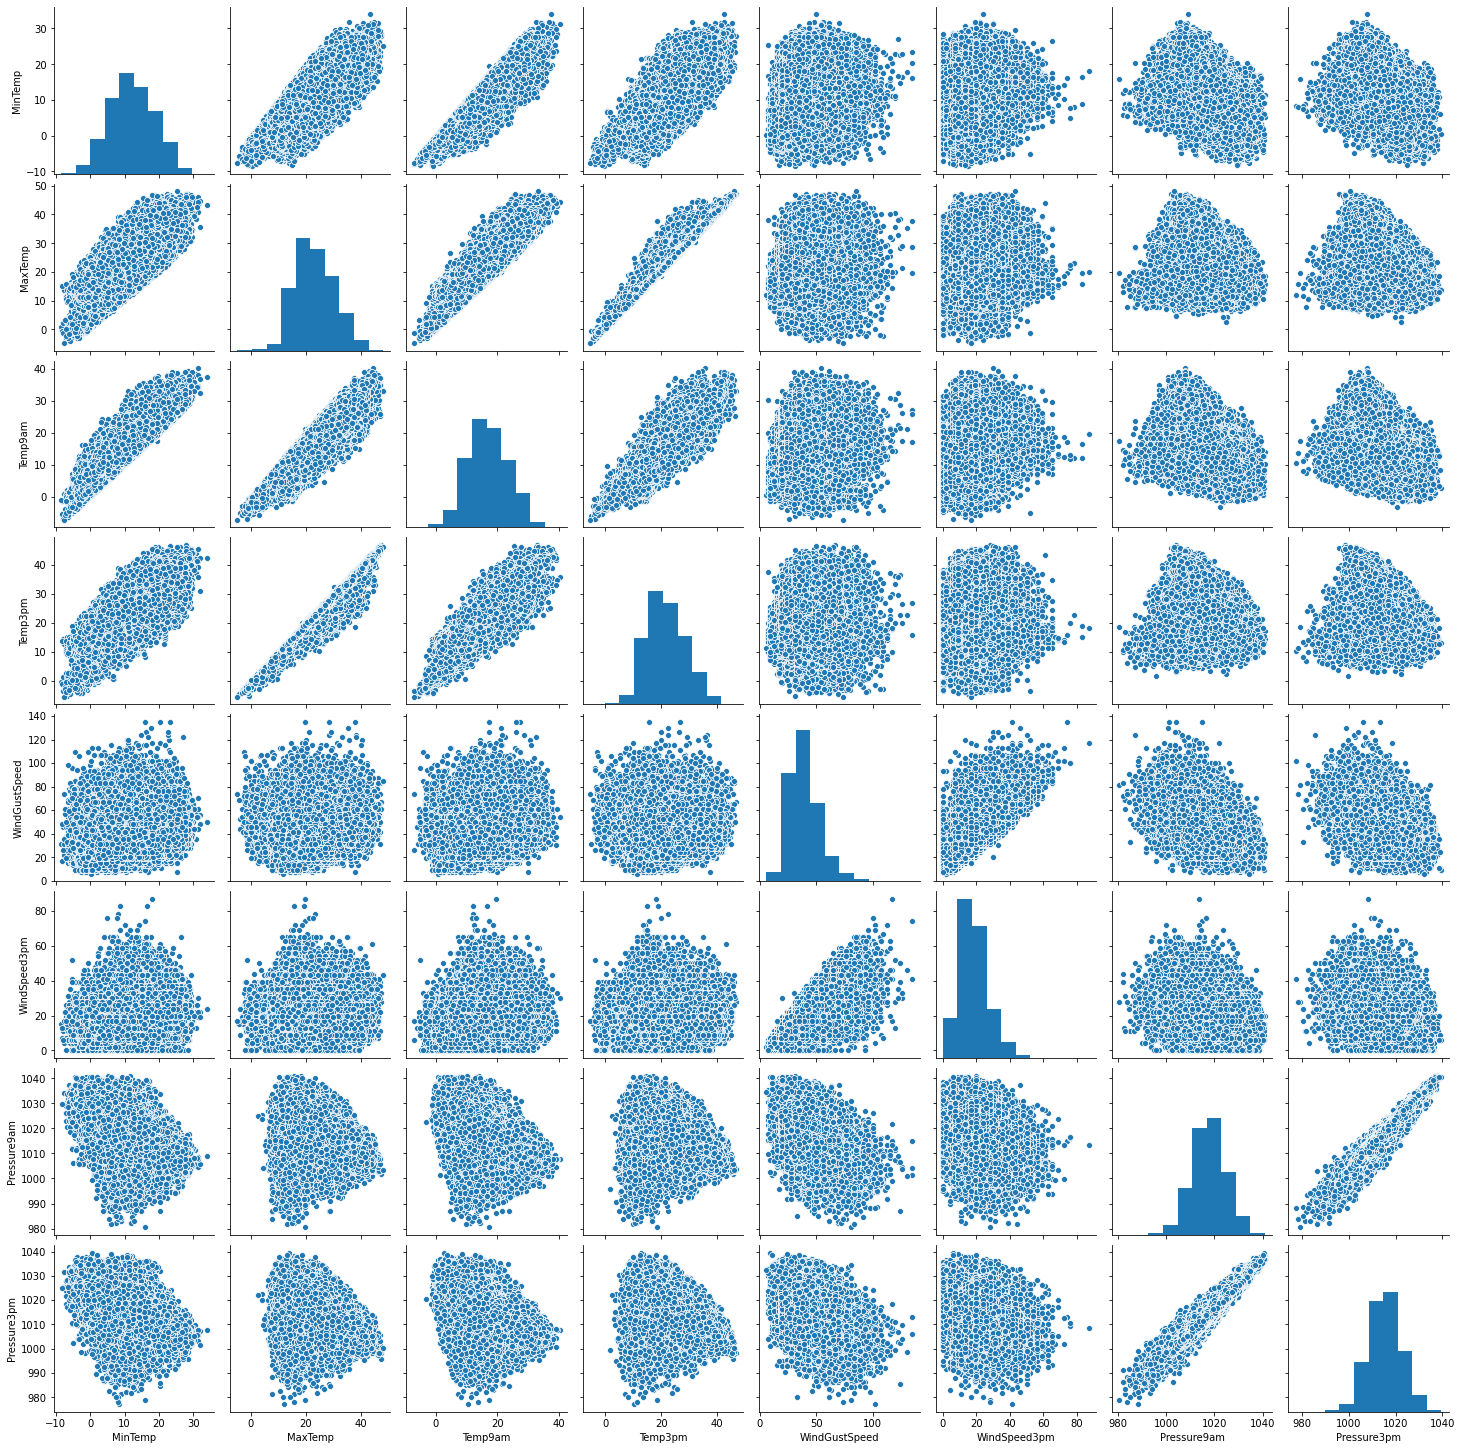

In [50]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## Feature and Target variable selection

In [51]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## Split data into separate training and test set 

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

## Feature Engineering

#### The categorical and numerical variables again separately.

Updating the list of categorical variables, to reflect changes

In [54]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [55]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [56]:
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

Imputing the missing values in numerical variables 

In [57]:
X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

#### Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [58]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [59]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [60]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

we can see that there are no missing values in the numerical columns of training and test set.

In [61]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [62]:
print("Null values in Train Set")
print(X_train[categorical].isnull().sum())
print("*********************")
print("Null values in Test Set")
print(X_test[categorical].isnull().sum())



Null values in Train Set
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64
*********************
Null values in Test Set
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


## Handling outliers in numerical variables

Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers.

In [63]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [64]:
print("Rain fall Max values")
print(X_train.Rainfall.max(), X_test.Rainfall.max())
print("Evaporation fall Max values")
print(X_train.Evaporation.max(), X_test.Evaporation.max())
print("WindSpeed9am fall Max values")
print(X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max())
print("WindSpeed3pm fall Max values")
print(X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max())

Rain fall Max values
3.2 3.2
Evaporation fall Max values
21.8 21.8
WindSpeed9am fall Max values
55.0 55.0
WindSpeed3pm fall Max values
57.0 57.0


In [65]:
X_train[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.884074      13.978155      18.614756   
std         2.769480      13.116959       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       68.867486      51.509547    1017.640649    1015.241101   
std        18.935587      20.530723       6.738680       6.675168   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        4.651801       4.703588      16.995062      21.688643   
std         2.292726       2.117847       6.463772       6.855649   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.300000   
max         9.000000       8.000000      40.200000      46.700000   

                Year          Month            Day  
count  113754.000000  113754.000000  113754.000000  
mean     2012.759727       6.404021      15.710419  
std         2.540419       3.427798       8.796821  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

### Encoding RainToday category

In [66]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [67]:
X_train.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
110803   Witchcliffe     13.9     22.6       0.2          4.8       8.5   
87289         Cairns     22.4     29.4       2.0          6.0       6.3   
134949  AliceSprings      9.7     36.2       0.0         11.4      12.3   
85553         Cairns     20.5     30.1       0.0          8.8      11.1   
16110      Newcastle     16.8     29.2       0.0          4.8       8.5   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
110803           S           41.0        SSE          S  ...       1013.4   
87289          ENE           33.0        SSE         SE  ...       1013.1   
134949           E           31.0         NE          N  ...       1013.6   
85553          ESE           37.0        SSE          E  ...       1010.8   
16110            W           39.0          N         SE  ...       1015.2   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday_0  RainToday_1  Year  \
110803       5.0       5.0     18.8     20.4            0            1  2014   
87289        7.0       5.0     26.4     27.5            1            0  2015   
134949       1.0       1.0     28.5     35.0            0            1  2014   
85553        2.0       3.0     27.3     29.4            0            1  2010   
16110        5.0       8.0     22.2     27.0            0            1  2012   

        Month  Day  
110803      4   25  
87289      11    2  
134949     10   19  
85553      10   30  
16110      11    8  

[5 rows x 25 columns]

We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

## Concatinating the Training and Test set

In [68]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [69]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

## Feature Scaling 

In [70]:
cols = X_train.columns

#### Min Max Scaling is done here after handling Outliers

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [72]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [73]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [74]:
X_train.head(7)

MinTemp   MaxTemp Rainfall Evaporation  Sunshine WindGustSpeed  \
0  0.524941  0.517958   0.0625    0.220183  0.586207      0.271318   
1  0.726841  0.646503   0.6250    0.275229  0.434483      0.209302   
2  0.425178  0.775047   0.0000    0.522936  0.848276      0.193798   
3  0.681710  0.659735   0.0000    0.403670  0.765517      0.240310   
4  0.593824  0.642722   0.0000    0.220183  0.586207      0.255814   
5  0.339667  0.283554   1.0000    0.220183  0.586207      0.372093   
6  0.591449  0.563327   0.0000    0.220183  0.586207      0.186047   

  WindSpeed9am WindSpeed3pm Humidity9am Humidity3pm  ...  NNW   NW    S   SE  \
0     0.363636     0.491228        0.65        0.55  ...  0.0  0.0  1.0  0.0   
1     0.127273     0.333333        0.71        0.59  ...  0.0  0.0  0.0  1.0   
2     0.272727     0.192982        0.06        0.02  ...  0.0  0.0  0.0  0.0   
3     0.400000     0.333333        0.59        0.53  ...  0.0  0.0  0.0  0.0   
4     0.000000     0.122807        0.72        0.53  ...  0.0  0.0  0.0  1.0   
5     0.163636     0.543860        0.96        0.67  ...  0.0  0.0  0.0  0.0   
6     0.163636     0.228070        0.76        0.61  ...  0.0  0.0  1.0  0.0   

   SSE  SSW   SW    W  WNW  WSW  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  1.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  

[7 rows x 118 columns]

## Model training 

We have prepared the data for Machine Learning Model. Now, lets shortlist the best Machine Learning algorithm for our model. Let's analyze various algorithms without any hyperparamter tuning to shortlist the best model.

In [75]:
#importing libraries of machine learning algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Cross Validation
from sklearn.model_selection import cross_val_score

In [76]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support

#### Creating a list of 3 most common Classification process to identify the best model amoung them

In [77]:
models = [('Decision Tree',DecisionTreeClassifier()),
          ('Random Forest',RandomForestClassifier()),
          ('Logistic Regression',LogisticRegression())]
          

We are checking for AUC score and accuracy score for all models and getting the average using Cross validation here in this step itself. 


In [78]:
acc_score = []
auc_score = []
model_name = []

#Creating a DataFrame to store performance of each model
df_results = pd.DataFrame(columns=['Name','AUC Mean','AUC STD',
                                   'Accuracy Mean','Accuracy STD'])

#Performing cross validation for each model to find the best model
i=0
for name,model in models:
    #Cross Validation
    accuracy = cross_val_score(model,X_train,y_train,cv=5,
                             scoring='accuracy',
                            n_jobs=-1,verbose=10)

    auc = cross_val_score(model,X_train,y_train,cv=10,
                             scoring='roc_auc',
                            n_jobs=-1,verbose=10)
    #Appending the result to list
    acc_score.append(accuracy)
    auc_score.append(auc)
    model_name.append(name)
    #Appending the performance to the Dataframe
    df_results.loc[i] = [name,
                         auc.mean(),
                         auc.std(),
                         accuracy.mean(),
                         accuracy.std()]
    i += 1
#Displaying the performance of the cross validation    
df_results.sort_values(by=['AUC Mean'],ascending=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   16.7s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   29.1s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   30.2s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   38.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   59.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min r

Name  AUC Mean   AUC STD  Accuracy Mean  Accuracy STD
1        Random Forest  0.883596  0.003313       0.854537      0.002410
2  Logistic Regression  0.869586  0.002956       0.847276      0.001176
0        Decision Tree  0.697715  0.003854       0.784764      0.002706

### Box Plotting the results of AUC score for all three algorithms

In [79]:
#Plotting the test results as boxplot
plt.figure(figsize=(10,5))
plt.violinplot(auc_score)
plt.xticks(range(1,len(model_name)+1),model_name)
plt.title("Area under Curve")
plt.show()

From this we could clearly see that Random Forest outperforms the other two. Hence going forward we will be using Random Forest as our main model.

## Check accuracy score 

In [80]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)

In [81]:
score 

0.8122296845880657

Accuracy code for test dataset is 81

##### To get to know better on Accuracy score and its features, you can visit SKlearn's official documentation to know better.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model.

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21862   205]
 [ 5135  1237]]

True Positives(TP) =  21862

True Negatives(TN) =  1237

False Positives(FP) =  205

False Negatives(FN) =  5135


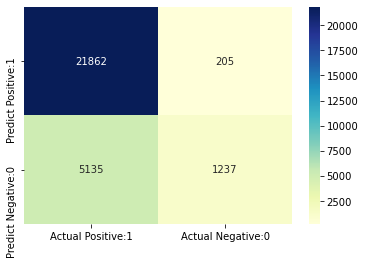

In [83]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

####  The confusion matrix shows 21862 + 1237 = 23099 correct predictions and 5135 + 205 = 5340 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 21862
- True Negatives (Actual Negative:0 and Predict Negative:0) - 1237
- False Positives (Actual Negative:0 but Predict Positive:1) - 205 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 5135 (Type II error)


# Classification Metrices 

#### Precision, Recall, f1 and support scores for the model

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.99      0.89     22067
         Yes       0.86      0.19      0.32      6372

    accuracy                           0.81     28439
   macro avg       0.83      0.59      0.60     28439
weighted avg       0.82      0.81      0.76     28439



# Classification Accuracy

In [85]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [86]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8122


> accuracy is 0.81 on test data of classification accuracy

### Classification Error 

In [87]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1878


### Precision 

precision can be defined as the ratio of TP to (TP + FP)

In [88]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9907


#### Recall 

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [89]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8098


## ROC - AUC

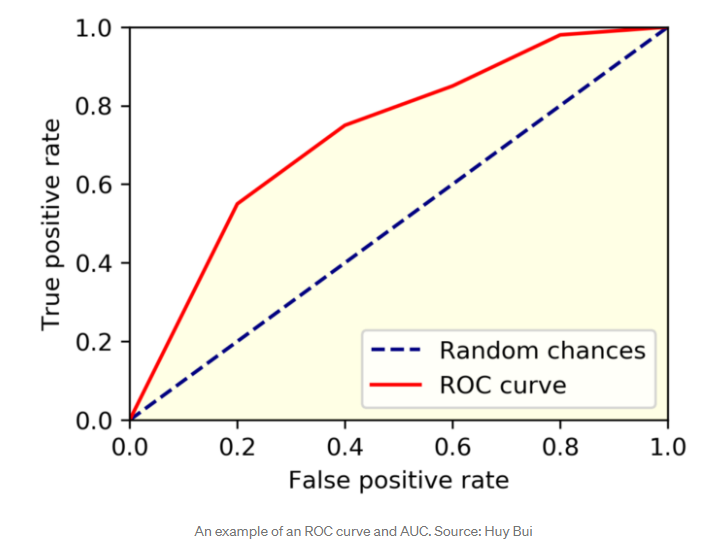

In [90]:
y_pred1 = best_rf.predict_proba(X_test)[:, 1]

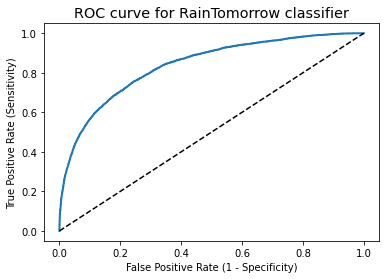

In [91]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


### Compute ROC AUC

In [92]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8373


##### For more information on ROC and AUC score please visit the documentation for understanding more.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

## Hyperparameter Tuning, using Gridsearch CV, it has cross validation it it

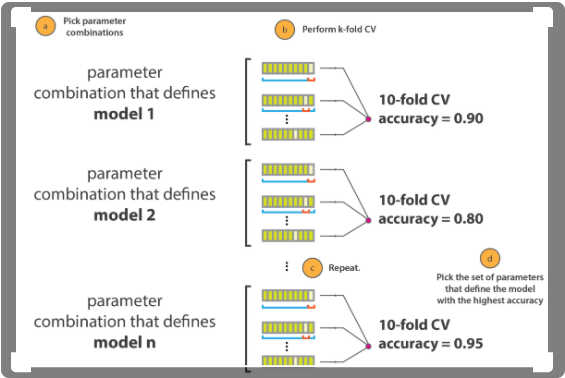

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 15, 25]
 

forest = RandomForestClassifier(random_state = 1)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
final_F = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 118.0min finished


In [95]:
gridF.best_params_

{'max_depth': 25, 'n_estimators': 1200}

In [96]:
gridF.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=1200, random_state=1)

##### Official documentation of Gridsearch CV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Creating a model from the best parameters from Grid search CV

In [97]:
Best_final_model = gridF.best_estimator_

### Testing with the Hyper parameter tuned model 

In [98]:
# print the scores on training and test set

#print('Training set score: {:.4f}'.format(bestF.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(Best_final_model.score(X_test, y_test)))

Test set score: 0.8587


## !!!SUCCESS!!!

We could see that the model is scored 4% more than initial model evaluation, Clearly hyper parameter tuning using GridsearchCV has tuned the model to perform better


In [99]:
y_pred_test = Best_final_model.predict(X_test)

In [100]:
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [101]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
results

Actual Predicted
86232      No        No
57576      No        No
124071     No        No
117955     No        No
133468     No        No
...       ...       ...
35297      No        No
48566      No        No
131684     No        No
89915      No        No
66813     Yes       Yes

[28439 rows x 2 columns]

# Creating the Output file with Actual and Predicted values

In [102]:
results_csv_data = results.to_csv('results.csv', index = True) 

The output file will be created with both actual values and predicted values

## Backup the model

Model should be preserved to be used further on app or website.Let us pickle the model

In [103]:
import pickle

with open('Rain_Prediction_bestmodel.pkl','wb') as file:
    pickle.dump(Best_final_model,file)

> Once backup is done we can import this easily by calling the pickle file and start predicting on new data.
We Pickle file can be used in multiple ways mainly for Deployment.

##### To Know the benefits of Pickle : 

Watch this:
        https://www.synopsys.com/blogs/software-security/python-pickling/#:~:text=Pickle%20in%20Python%20is%20primarily,transport%20data%20over%20the%20network.
           
Pickle Documentation: https://docs.python.org/3/library/pickle.html

### Results and Conclusion

1. When we performed 3 models with Cross Validation we could get a score of 88% AUC for Random forest hence we continued with Random Forest as main model.

2. We chose ROC AUC as validation metric instead of accuracy score, since our target is unbalanced with 78% of No(will not rain) and 22% of Yes(will rain tomorrow) we have have chosen ROC AUC over accuracy to avoid Biased results.

3. The initial testing results are 81% in Test set.

4. Once Gridsearch CV is used for Hyperparameter tuning along with CV of 5 folds, the best Predicted model gets the score of 85% this clearly help us realize Gridsearch CV has improved the test score efficiency by 4%.

5. There is clearly no Under/over fitting in our solution.

6. Appropriate references and link to official documentation has been included wherever necessary for viewers ease.

7. Using Pickle from SK Learn we have taken a backup of the final model so that we can use and deploy it easily.

8. Output file has been written with actual and predicted Test results.